<a href="https://colab.research.google.com/github/aryansaini25/datascienceproject/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('fraudTest.csv')
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
null_counts = data.isnull().sum()
print("Count of null values in each column:")
print(null_counts)


Count of null values in each column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64


In [ ]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows based on all columns:")
print(duplicate_rows)


Duplicate rows based on all columns:
Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


In [ ]:
duplicate_rows_specific = data[data.duplicated(['category'])]
print("Duplicate rows based on a specific column:")
print(duplicate_rows_specific)


Duplicate rows based on a specific column:
       Unnamed: 0 trans_date_trans_time            cc_num  \
1               1   2020-06-21 12:14:33  3573030041201292   
6               6   2020-06-21 12:15:44   213180742685905   
7               7   2020-06-21 12:15:50  3589289942931264   
10             10   2020-06-21 12:16:20  2242542703101233   
11             11   2020-06-21 12:16:47      571465035400   
...           ...                   ...               ...   
15577       15577   2020-06-26 18:05:18   213157767990030   
15578       15578   2020-06-26 18:05:19  4586810168620942   
15579       15579   2020-06-26 18:05:32  3514897282719543   
15580       15580   2020-06-26 18:05:48  4452366298769043   
15581       15581   2020-06-26 18:06:10     4259996134423   

                                  merchant        category     amt     first  \
1                     fraud_Sporer-Keebler   personal_care   29.84    Joanne   
6                      fraud_Romaguera Ltd  health_fitness  133.

In [5]:
# Check for missing values
print(data.isnull().sum())

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Fill missing values in numeric columns with the mean
numeric_data.fillna(numeric_data.mean(), inplace=True)

# If we want to keep non-numeric columns, we can re-combine them:
data = data.drop(numeric_data.columns, axis=1).join(numeric_data)

# Drop rows with missing values in the numeric columns
numeric_data.dropna(inplace=True)

print(numeric_data.isnull().sum())
 # Verify no more missing values in numeric columns

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


In [6]:

# Removing duplicates
data.drop_duplicates(inplace=True)

In [7]:
# Scaling numeric data (only scale numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [8]:
# Encoding categorical variables (only encode object type columns)
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

Feature Engineering

In [9]:


# Convert transaction time to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Create new features: transaction hour and transaction day of the week
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['transaction_day'] = data['trans_date_trans_time'].dt.dayofweek

# Calculate transaction frequency per user (using credit card number as identifier)
data['transaction_frequency'] = data.groupby('cc_num')['cc_num'].transform('count')

# Calculate average transaction amount per user
data['avg_transaction_amt'] = data.groupby('cc_num')['amt'].transform('mean')

# Display the first few rows to check the new features
data.head()


,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,...,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_frequency,avg_transaction_amt
0,1970-01-01 00:00:00.000000000,319,10,148,112,1,336,156,39,274,...,0.664835,0.706105,-1.732349,-0.874651,0.644313,-0.053197,0,3,10,-0.369183
1,1970-01-01 00:00:00.000000001,591,10,160,448,0,349,16,43,390,...,-1.504424,-0.294431,-1.732188,0.191810,-1.467376,-0.053197,0,3,10,-0.249596
2,1970-01-01 00:00:00.000000002,611,5,24,245,0,841,61,33,258,...,1.208905,-0.191751,-1.731786,0.395830,1.158627,-0.053197,0,3,10,-0.171977
3,1970-01-01 00:00:00.000000003,222,9,42,448,1,315,745,8,405,...,0.673394,-0.130880,-1.731343,-1.884488,0.667636,-0.053197,0,3,7,-0.097540
4,1970-01-01 00:00:00.000000004,292,13,244,257,1,538,245,21,195,...,0.364710,-0.291957,-1.731302,1.266965,0.300387,-0.053197,0,3,11,-0.142876


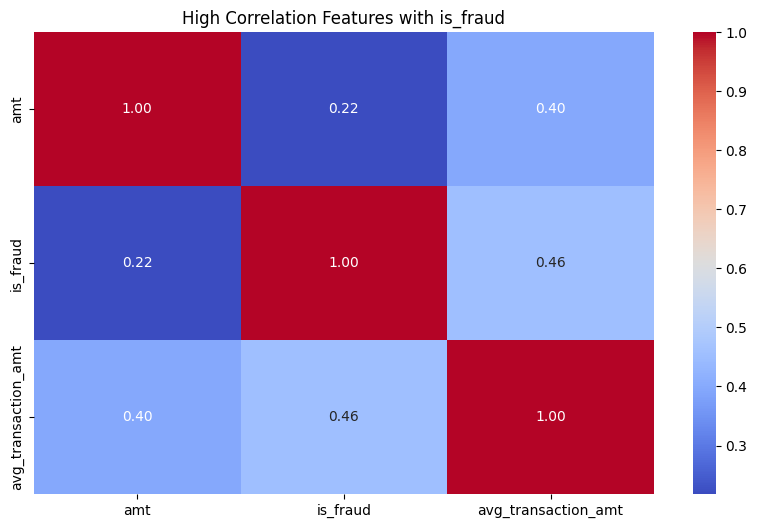

In [11]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Filter out features with high correlation to 'is_fraud'
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['is_fraud']) > 0.1]

# Display the correlation matrix for the selected features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data[high_correlation_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('High Correlation Features with is_fraud')
plt.show()


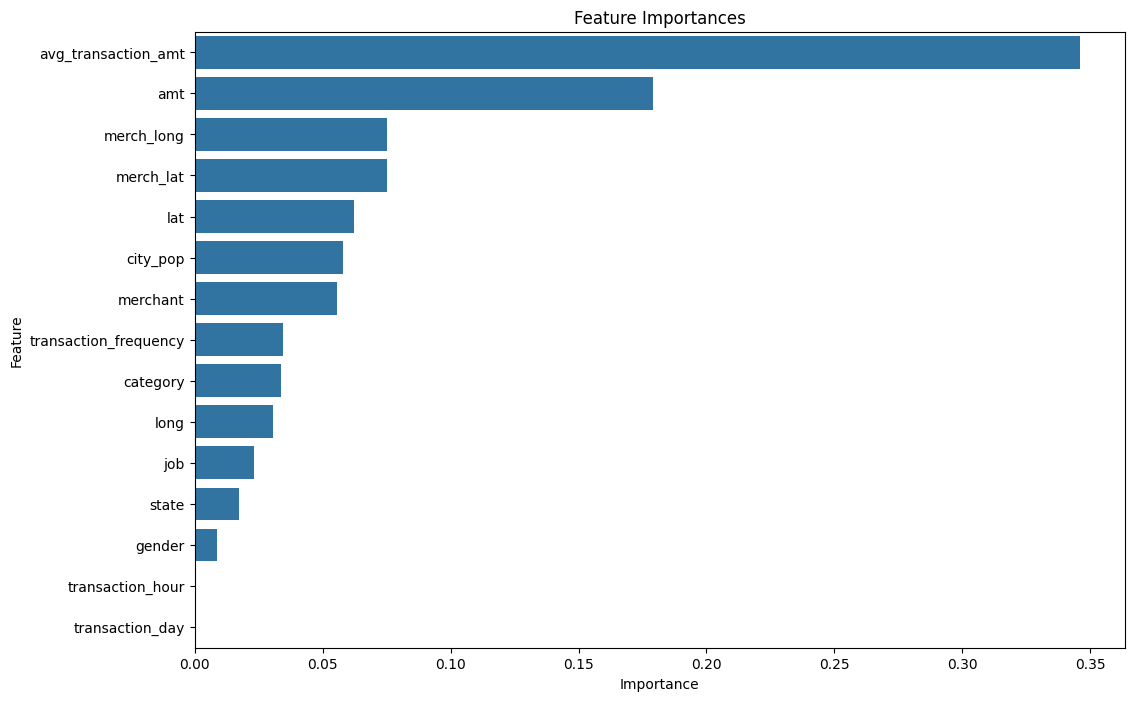

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features for the model
features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long',
            'gender', 'category', 'merchant', 'state', 'job',
            'transaction_hour', 'transaction_day', 'transaction_frequency', 'avg_transaction_amt']

# Prepare the data
X = data[features]
# Ensure 'is_fraud' is treated as a categorical variable
y = data['is_fraud'].astype(int)  # Convert to integer labels if necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()